In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path_new_notes = '../../files_tensorhero/Training Data/Processed/Facelift Pack 2/Stevie Ray Vaughan and Double Trouble - Texas Flood [xX760Xx]/notes.npy'
notes1 = np.load((path_new_notes))

In [2]:

notes_test = notes1
# notes_test[361] = 0
notes_test[1189] = 4
notes_test[803] = 0
notes_test[8010] = 2
notes_test[1237] = 15
notes_test[29885] = 4
notes_test[611] = 2
notes_test[8723] = 3
notes_test[24618] =0


In [26]:
print(notes1[8010])

0.0


In [28]:
def freq_saturation(truth,output):
    truth_nonzero = np.count_nonzero(truth)
    output_nonzero = np.count_nonzero(output)
    return output_nonzero/truth_nonzero
    

In [30]:
freq_saturation(notes1, notes_test)

0.9984313725490196

In [66]:
np.unique(notes1)

array([  0.,   1.,   2.,   3.,   4.,   5.,  12.,  13.,  14.,  15.,  19.,
        22.,  25.,  32.,  33.,  34.,  35.,  36.,  63.,  64.,  65.,  66.,
        67.,  94.,  95.,  96.,  97.,  98., 103., 104., 106., 108., 109.,
       112., 115., 117., 118., 125., 126., 127., 128., 129., 134., 135.,
       137., 156., 157., 187., 188., 189., 190., 191., 193., 196., 197.,
       199., 201., 202., 205., 208., 210., 211., 218., 219.])

In [67]:
def simplify_ohc_notes(notes_array):
   notes_array = notes_array.astype(int)
   for i in range(0,len(notes_array)):
    if notes_array[i] in [31.62,93,124,155,186,217]:
        notes_array[i] = 31
    elif notes_array[i] in [218,219,220,221,222,223,224]:
        notes_array[i] = 32
    else:
        notes_array[i] =  notes_array[i] % 31
   return notes_array 

In [89]:
notes_mod = simplify_ohc_notes(notes1)
notes_testmod = simplify_ohc_notes(notes_test)

In [108]:
truth = np.histogram(notes_mod, bins = [0,1,6,16,26,31,32,33])
observed = np.histogram(notes_testmod, bins = [0,1,6,16,26,31,32,33])


In [111]:
truth[0], truth[1]

(array([31030,  1173,    72,    27,     0,     0,     3]),
 array([ 0,  1,  6, 16, 26, 31, 32, 33]))

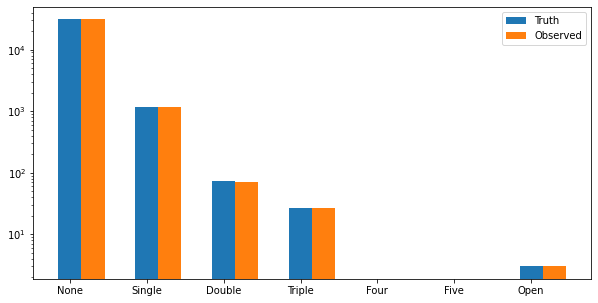

In [118]:
# Position of bars on x-axis
ind = np.array([0,1,2,3,4,5,6])

ticks = ['None', 'Single', 'Double', 'Triple', 'Four', 'Five', 'Open']
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, truth[0] , width,log = True, label='Truth')
plt.bar(ind + width, observed[0], width,log = True, label='Observed')
plt.legend()
plt.xticks(ind,ticks)
plt.show();



In [119]:
def freq_histogram(truth, output):
    true = np.histogram(truth, bins = np.arange(0,34))
    observed = np.histogram(output, bins = np.arange(0,34))
    # Position of bars on x-axis
    ind = np.arange(0,33)

    ticks = [str(val) for val in ind]
    # Figure size
    plt.figure(figsize=(10,5))

    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, true[0] , width,log = True, label='Truth')
    plt.bar(ind + width, observed[0], width,log = True, label='Observed')

    plt.xticks(ind + width / 2, ticks)
    plt.legend()
    plt.show();

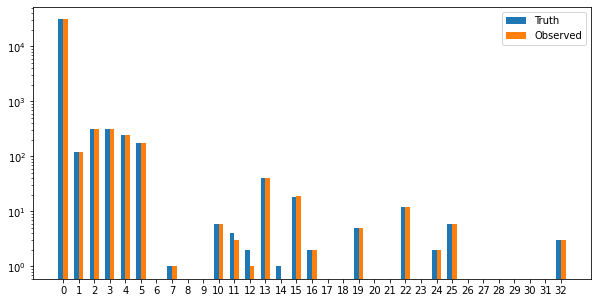

In [120]:
freq_histogram(notes_mod, notes_testmod)